<a href="https://colab.research.google.com/github/cintamg/Machine_Learning/blob/main/YBI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE CLASSIFICATION**

Data Source : KAGGLE(https://www.kaggle.com/alxmamaev/flowers-recognition)

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/MyDrive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/MyDrive/MyDrive/kaggle_dataset

/content/MyDrive/MyDrive/kaggle_dataset


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 221M/225M [00:03<00:00, 80.8MB/s]
100% 225M/225M [00:03<00:00, 74.5MB/s]


In [ ]:
!mkdir flowers-recognition
!mv flowers-recognition.zip flowers-recognition

mkdir: cannot create directory ‘flowers-recognition’: File exists


In [ ]:
%cd flowers-recognition/

/content/MyDrive/MyDrive/kaggle_dataset/flowers-recognition


In [ ]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
target=[]
images=[]
flatten_data=[]

In [ ]:
DATADIR ='/content/MyDrive/MyDrive/kaggle_dataset/flowers-recognition/flowers'
CATEGORIES=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
for cat in CATEGORIES:
  class_num = CATEGORIES.index(cat) # Labell encoding
  path=os.path.join(DATADIR,cat) # Create path to use images
  for img in os.listdir(path):
    img_arr=imread(os.path.join(path,img))
    img_resized=resize(img_arr,(150,150,3)) #Normalizes the value to [0,1]
    flatten_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flatten_data)
target=np.array(target)
images=np.array(images)

In [ ]:
flat_data.shape

(4317, 67500)

<BarContainer object of 5 artists>

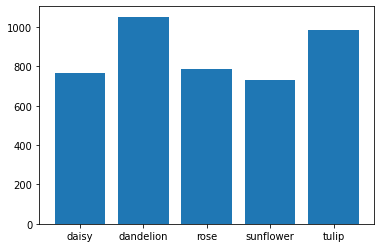

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=84)
print(x_train.shape)
print(x_test.shape)

(3021, 67500)
(1296, 67500)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=300)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([3, 3, 1, ..., 2, 4, 1])

In [ ]:
y_test

array([3, 3, 1, ..., 2, 4, 2])

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 61,  43,  22,  28,  34],
       [ 99, 182,  43,  65,  60],
       [ 27,  23,  92,  23,  64],
       [ 16,  39,  13,  88,  29],
       [ 21,  28,  64,  24, 108]])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.4097222222222222

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.27      0.32      0.30       188
           1       0.58      0.41      0.48       449
           2       0.39      0.40      0.40       229
           3       0.39      0.48      0.43       185
           4       0.37      0.44      0.40       245

    accuracy                           0.41      1296
   macro avg       0.40      0.41      0.40      1296
weighted avg       0.43      0.41      0.41      1296



In [ ]:
import pickle
pickle.dump(model,open('flowers.p','wb'))

In [ ]:
model=pickle.load(open('flowers.p','rb'))

Enter your URL :https://st.depositphotos.com/1036794/3807/i/600/depositphotos_38077819-stock-photo-sunflower.jpg
(600, 600, 3)
Predicted output : sunflower


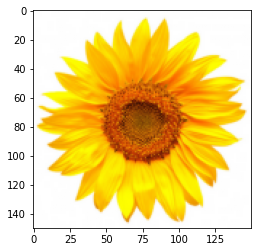

In [ ]:
#Testing a brand new image
flat_data=[]
url=input('Enter your URL :')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f"Predicted output : {y_out}")

Explanation : This is to classify five types of flowers(daisy, dandelion, rose, sunflower, tulip).